<a href="https://www.kaggle.com/code/darshankatkar/fraud-detection?scriptVersionId=113734387" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


fraud_train = pd.read_csv("../input/itsafraud/train.csv");
fraud_test = pd.read_csv("../input/itsafraud/test.csv");
fraud_train.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3424175,0,11053717,49.00,W,5033,269.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3206179,0,5150800,57.95,W,4527,376.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3410455,0,10713596,115.95,W,2772,512.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3058578,0,1611950,100.00,H,14290,512.0,150.0,visa,226.0,...,chrome 62.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
4,3242131,0,6111087,95.00,W,12839,321.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
fraud_test.shape

(147635, 433)

In [3]:
fraud_train.shape

(442905, 434)

In [4]:
fraud_train.drop('TransactionID', axis = 1, inplace = True)
fraud_test.drop('TransactionID', axis = 1, inplace = True)
fraud_train.head()
#Dropping TransactionID

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,11053717,49.00,W,5033,269.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,5150800,57.95,W,4527,376.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,10713596,115.95,W,2772,512.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1611950,100.00,H,14290,512.0,150.0,visa,226.0,debit,...,chrome 62.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
4,0,6111087,95.00,W,12839,321.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Some columns have too many missing values where as some have none
for col in fraud_train.columns:
    print(col)
    print(fraud_train[col].isna().sum())

isFraud
0
TransactionDT
0
TransactionAmt
0
ProductCD
0
card1
0
card2
6704
card3
1181
card4
1191
card5
3175
card6
1185
addr1
49094
addr2
49094
dist1
264291
dist2
414737
P_emaildomain
70931
R_emaildomain
340177
C1
0
C2
0
C3
0
C4
0
C5
0
C6
0
C7
0
C8
0
C9
0
C10
0
C11
0
C12
0
C13
0
C14
0
D1
935
D2
210525
D3
197091
D4
126656
D5
232318
D6
388196
D7
413817
D8
386742
D9
386742
D10
56929
D11
209495
D12
394531
D13
396600
D14
396335
D15
66751
M1
203382
M2
203382
M3
203382
M4
211147
M5
262741
M6
126786
M7
259844
M8
259834
M9
259834
V1
209495
V2
209495
V3
209495
V4
209495
V5
209495
V6
209495
V7
209495
V8
209495
V9
209495
V10
209495
V11
209495
V12
56964
V13
56964
V14
56964
V15
56964
V16
56964
V17
56964
V18
56964
V19
56964
V20
56964
V21
56964
V22
56964
V23
56964
V24
56964
V25
56964
V26
56964
V27
56964
V28
56964
V29
56964
V30
56964
V31
56964
V32
56964
V33
56964
V34
56964
V35
126693
V36
126693
V37
126693
V38
126693
V39
126693
V40
126693
V41
126693
V42
126693
V43
126693
V44
126693
V45
126693
V46
126693
V

In [6]:
#Checking for duplicate rows
fraud_train.duplicated().sum()

2

In [7]:
#Removing duplicate columns
fraud_train.drop(axis="rows", labels= fraud_train.index[fraud_train.duplicated()], inplace= True)
fraud_test.drop(axis="rows", labels= fraud_train.index[fraud_train.duplicated()], inplace= True)
fraud_train.shape

(442903, 433)

<AxesSubplot:xlabel='isFraud', ylabel='count'>

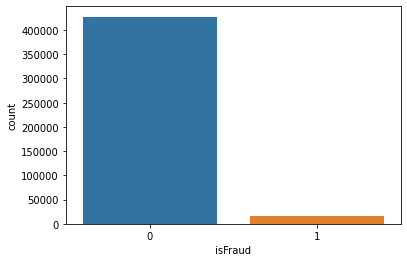

In [8]:
#Checking the distribution of the target values.
#So the data is extremely imbbalanced.
sns.countplot(x='isFraud', data= fraud_train)

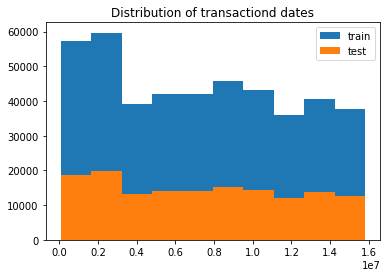

In [9]:
plt.hist(fraud_train['TransactionDT'], label='train');
plt.hist(fraud_test['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');

#This shows that transaction Date for test and train data are same

array([[<AxesSubplot:title={'center':'TransactionAmt'}>]], dtype=object)

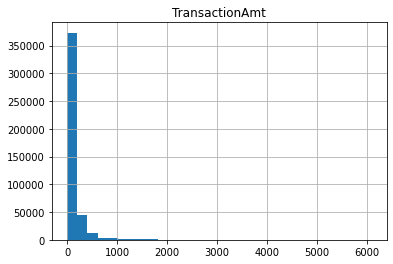

In [10]:
fraud_train.hist(column = 'TransactionAmt', bins = 30)
#The data is extremely skewed

In [11]:
fraud_train['TransactionAmt'] = np.log10(fraud_train['TransactionAmt']+1)
fraud_test['TransactionAmt'] = np.log10(fraud_test['TransactionAmt']+1)

array([[<AxesSubplot:title={'center':'TransactionAmt'}>]], dtype=object)

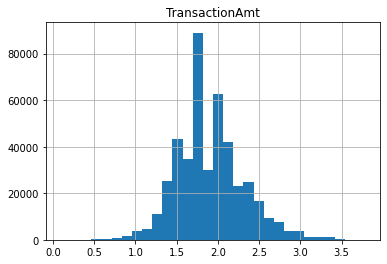

In [12]:
fraud_train.hist(column = 'TransactionAmt', bins=30)

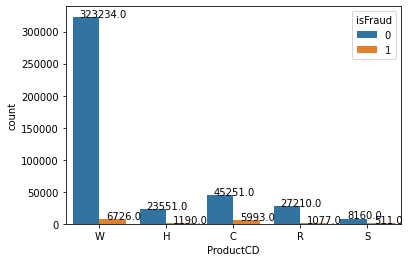

In [13]:
ax= sns.countplot(x='ProductCD',hue='isFraud', data= fraud_train)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+ 0.1, p.get_height()+ 50))

In [14]:
fraud_train['ProductCD'].value_counts()

W    329960
C     51244
R     28287
H     24741
S      8671
Name: ProductCD, dtype: int64

<AxesSubplot:title={'center':'card1'}, xlabel='card1', ylabel='count'>

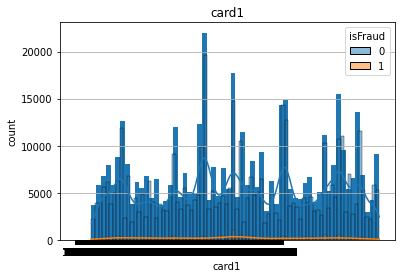

In [15]:
fraud_train.hist(column = 'card1', bins=60)
sns.countplot(x='card1', data= fraud_train)
sns.histplot(x='card1',hue='isFraud', data=fraud_train, kde=True)

<AxesSubplot:xlabel='card2', ylabel='Count'>

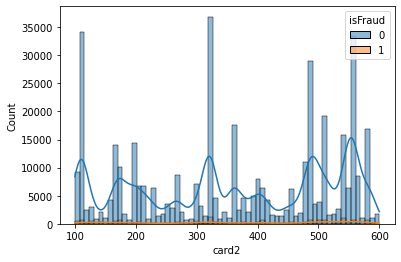

In [16]:
sns.histplot(x='card2',hue='isFraud', data=fraud_train, kde=True)


<AxesSubplot:xlabel='card3', ylabel='Count'>

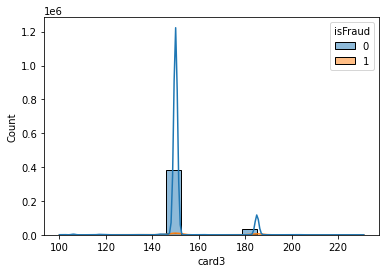

In [17]:
sns.histplot(x='card3',hue='isFraud', data=fraud_train, kde=True)


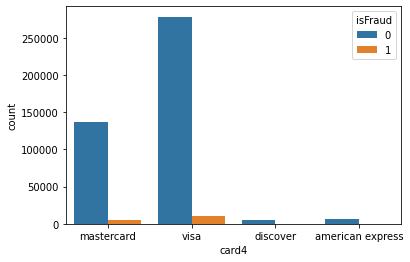

In [18]:
ax= sns.countplot(x='card4',hue='isFraud', data= fraud_train)


<AxesSubplot:xlabel='card5', ylabel='Count'>

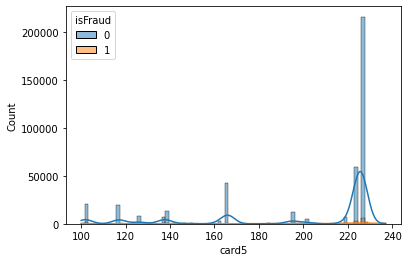

In [19]:
sns.histplot(x='card5',hue='isFraud', data=fraud_train, kde=True)


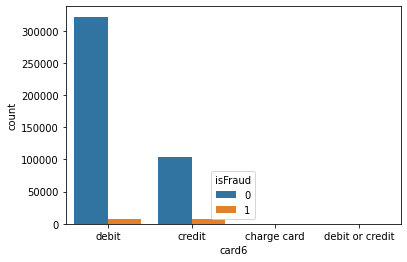

In [20]:
ax= sns.countplot(x='card6',hue='isFraud', data= fraud_train)

<AxesSubplot:xlabel='addr1', ylabel='Count'>

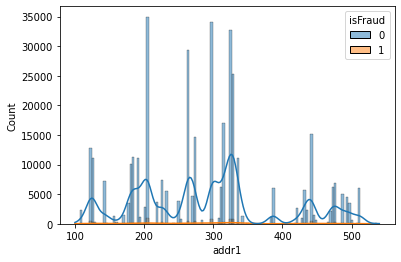

In [21]:
sns.histplot(x='addr1',hue='isFraud', data=fraud_train, kde=True)

<AxesSubplot:xlabel='addr2', ylabel='Count'>

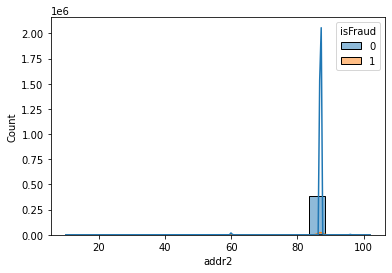

In [22]:
sns.histplot(x='addr2',hue='isFraud', data=fraud_train, kde=True)
#Almost 99% of the transactions had the same value for addr2 feature which helped in concluding that this
#feature corresponds to the Country Code and most of the transactions belong to the same country

[Text(0, 0, 'gmail.com'),
 Text(1, 0, 'centurylink.net'),
 Text(2, 0, 'yahoo.com'),
 Text(3, 0, 'NaN'),
 Text(4, 0, 'anonymous.com'),
 Text(5, 0, 'mac.com'),
 Text(6, 0, 'comcast.net'),
 Text(7, 0, 'optonline.net'),
 Text(8, 0, 'bellsouth.net'),
 Text(9, 0, 'hotmail.com'),
 Text(10, 0, 'aol.com'),
 Text(11, 0, 'me.com'),
 Text(12, 0, 'msn.com'),
 Text(13, 0, 'earthlink.net'),
 Text(14, 0, 'att.net'),
 Text(15, 0, 'cableone.net'),
 Text(16, 0, 'sbcglobal.net'),
 Text(17, 0, 'outlook.es'),
 Text(18, 0, 'suddenlink.net'),
 Text(19, 0, 'icloud.com'),
 Text(20, 0, 'twc.com'),
 Text(21, 0, 'gmx.de'),
 Text(22, 0, 'ymail.com'),
 Text(23, 0, 'verizon.net'),
 Text(24, 0, 'cox.net'),
 Text(25, 0, 'yahoo.es'),
 Text(26, 0, 'aim.com'),
 Text(27, 0, 'windstream.net'),
 Text(28, 0, 'hotmail.es'),
 Text(29, 0, 'rocketmail.com'),
 Text(30, 0, 'yahoo.com.mx'),
 Text(31, 0, 'live.com'),
 Text(32, 0, 'juno.com'),
 Text(33, 0, 'sc.rr.com'),
 Text(34, 0, 'outlook.com'),
 Text(35, 0, 'live.com.mx'),
 Text(3

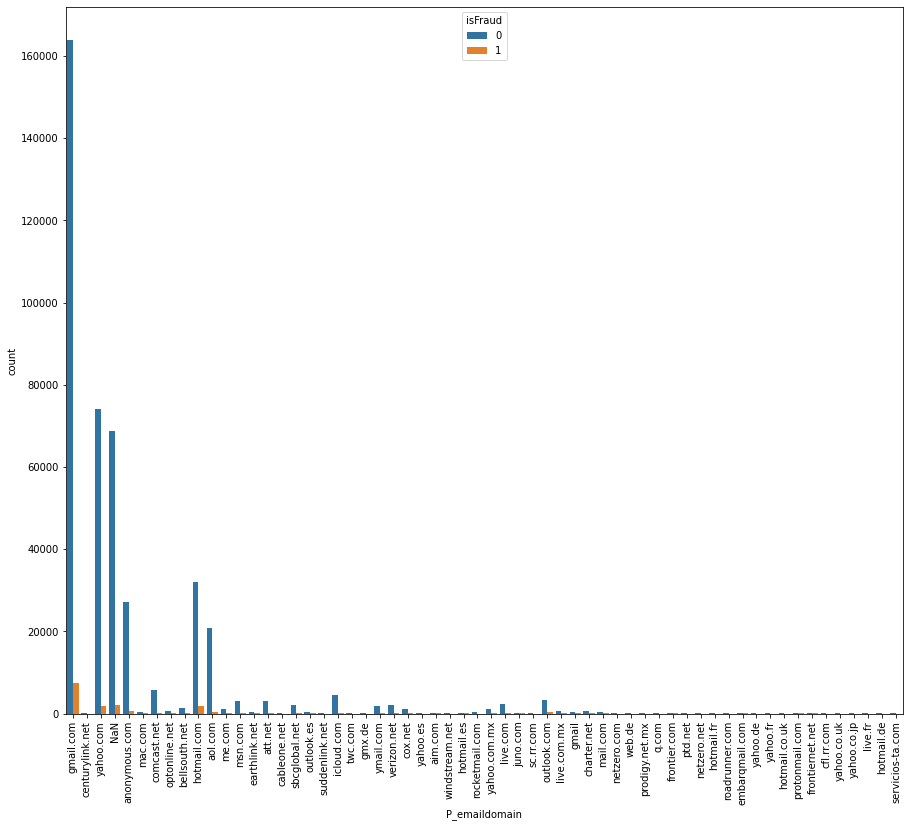

In [23]:
fraud_train['P_emaildomain'] = fraud_train['P_emaildomain'].fillna('NaN')
fraud_test['P_emaildomain'] = fraud_test['P_emaildomain'].fillna('NaN')
plt.figure(figsize=(15, 13))
chart = sns.countplot(x='P_emaildomain',hue='isFraud', data=fraud_train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, ha='center')

[Text(0, 0, 'NaN'),
 Text(1, 0, 'yahoo.com'),
 Text(2, 0, 'gmail.com'),
 Text(3, 0, 'anonymous.com'),
 Text(4, 0, 'comcast.net'),
 Text(5, 0, 'optonline.net'),
 Text(6, 0, 'hotmail.com'),
 Text(7, 0, 'bellsouth.net'),
 Text(8, 0, 'aol.com'),
 Text(9, 0, 'cableone.net'),
 Text(10, 0, 'outlook.es'),
 Text(11, 0, 'me.com'),
 Text(12, 0, 'outlook.com'),
 Text(13, 0, 'gmx.de'),
 Text(14, 0, 'msn.com'),
 Text(15, 0, 'icloud.com'),
 Text(16, 0, 'cox.net'),
 Text(17, 0, 'hotmail.es'),
 Text(18, 0, 'yahoo.com.mx'),
 Text(19, 0, 'att.net'),
 Text(20, 0, 'roadrunner.com'),
 Text(21, 0, 'verizon.net'),
 Text(22, 0, 'live.com'),
 Text(23, 0, 'live.com.mx'),
 Text(24, 0, 'ptd.net'),
 Text(25, 0, 'rocketmail.com'),
 Text(26, 0, 'scranton.edu'),
 Text(27, 0, 'web.de'),
 Text(28, 0, 'prodigy.net.mx'),
 Text(29, 0, 'sbcglobal.net'),
 Text(30, 0, 'netzero.net'),
 Text(31, 0, 'aim.com'),
 Text(32, 0, 'charter.net'),
 Text(33, 0, 'mail.com'),
 Text(34, 0, 'hotmail.fr'),
 Text(35, 0, 'frontier.com'),
 Text(

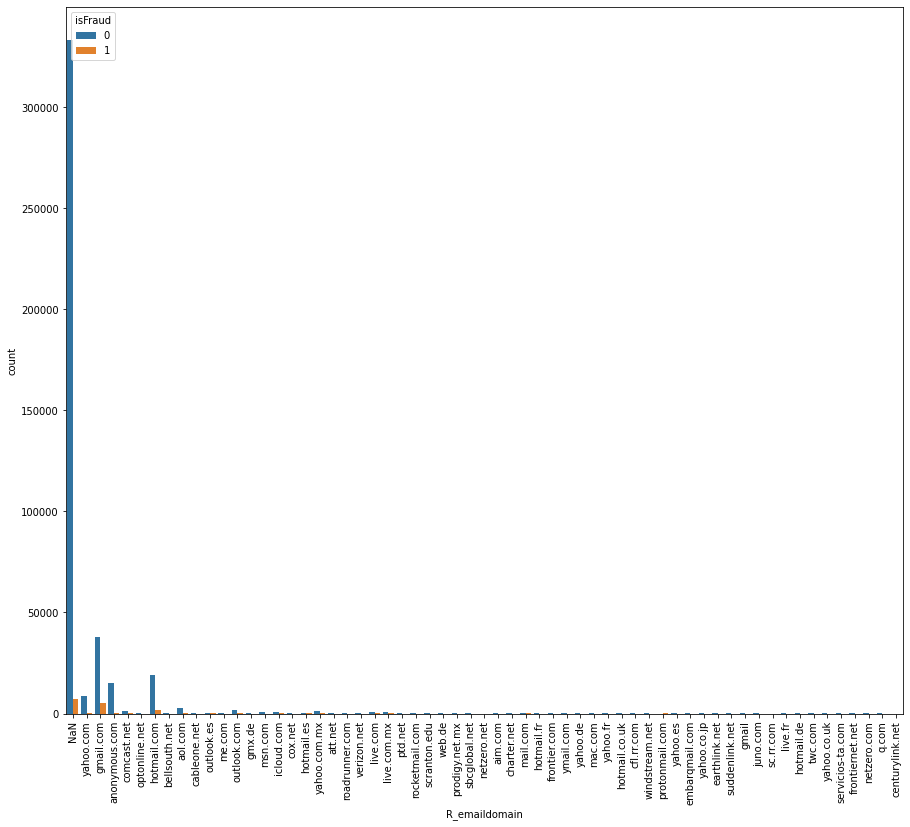

In [24]:
fraud_train['R_emaildomain'] = fraud_train['R_emaildomain'].fillna('NaN')
fraud_test['R_emaildomain'] = fraud_test['R_emaildomain'].fillna('NaN')
plt.figure(figsize=(15, 13))
chart = sns.countplot(x='R_emaildomain',hue='isFraud', data=fraud_train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, ha='center')
#Majority of the transactions did not have the R_emaildomain value and the reason for this was the fact that not every
#transaction needed a transaction receipt and hence no information about the Receiver was present.

In [25]:
fraud_train.iloc[:, 45:54].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M0,T,F,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN
2,T,T,T,NaN,NaN,T,F,F,T
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T,T,T,M0,F,F,F,T,T


In [26]:
fraud_test.iloc[:, 44:53].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M0,T,T,F,F,T
1,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T,T,T,NaN,NaN,F,F,F,F
4,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN


In [27]:
print(fraud_train.M1.unique())
print(fraud_train.M2.unique())
print(fraud_train.M3.unique())
print(fraud_train.M4.unique())
print(fraud_train.M5.unique())
print(fraud_train.M6.unique())
print(fraud_train.M7.unique())
print(fraud_train.M8.unique())
print(fraud_train.M9.unique())

['T' nan 'F']
['T' nan 'F']
['T' nan 'F']
['M0' nan 'M2' 'M1']
['T' nan 'F']
['F' 'T' nan]
[nan 'F' 'T']
[nan 'F' 'T']
[nan 'T' 'F']


In [28]:
m_features = fraud_train.iloc[:, 45:54]
m_features.describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,239522,239522,239522,231757,180163,316118,183060,183070,183070
unique,2,2,2,3,2,2,2,2,2
top,T,T,T,M0,F,F,F,F,T
freq,239504,214072,188856,147473,99584,171103,158439,116400,154135


In [29]:
m_featuresTest = fraud_test.iloc[:, 44:53]
m_featuresTest.describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,79917,79917,79917,77338,59894,105061,61214,61217,61217
unique,2,2,2,3,2,2,2,2,2
top,T,T,T,M0,F,F,F,F,T
freq,79910,71395,62874,48931,32907,56753,52934,38850,51521


In [30]:
#m_features['M1'] = m_features['M1'].fillna('Missing')
#sns.countplot(x='M1', data= m_features)

In [31]:
#m_features['M2'] = m_features['M2'].fillna('Missing')
#sns.countplot(x='M2', data= m_features)

<AxesSubplot:xlabel='M3', ylabel='count'>

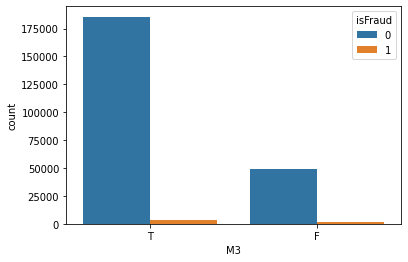

In [32]:
m_features['M3'] = m_features['M3'].fillna('Missing')
m_featuresTest['M3'] = m_featuresTest['M3'].fillna('Missing')
sns.countplot(x='M3', hue='isFraud' ,data= fraud_train)

<AxesSubplot:xlabel='M4', ylabel='count'>

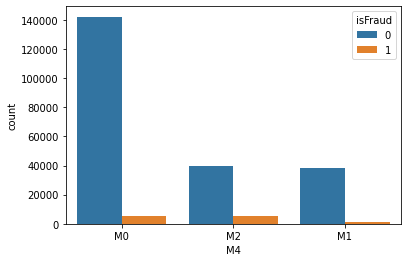

In [33]:
m_features['M4'] = m_features['M4'].fillna('Missing')
m_featuresTest['M4'] = m_featuresTest['M4'].fillna('Missing')
sns.countplot(x='M4', hue= 'isFraud',data= fraud_train)

In [34]:
#m_features['M5'] = m_features['M5'].fillna('Missing')
#sns.countplot(x='M5', data= m_features)

In [35]:
#m_features['M6'] = m_features['M6'].fillna('Missing')
#sns.countplot(x='M6', data= m_features)

In [36]:
#m_features['M7'] = m_features['M7'].fillna('Missing')
#sns.countplot(x='M7', data= m_features)

In [37]:
#m_features['M8'] = m_features['M8'].fillna('Missing')
#sns.countplot(x='M8', data= m_features)

In [38]:
#m_features['M9'] = m_features['M9'].fillna('Missing')
#sns.countplot(x='M9', data= m_features)

In [39]:
#M1 to M9 have Values T, F or NaN. Except for M4 which has values such as M0, M1 and M2. We can make aggregate features for these binary values columns
#Features M2 and M6 have less % of missing values than the other M features.
#Except M4, all the other features missing value has the higest fraud percentage

<AxesSubplot:>

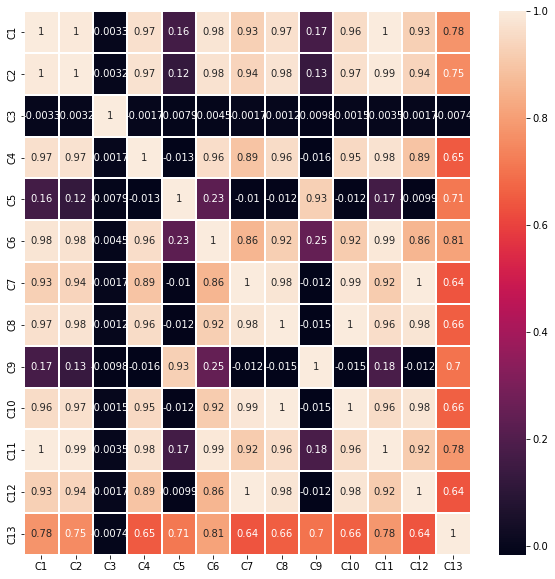

In [40]:
#We checked the data in C-features and had an intuition that it might be related
#So we checked the correlation matrix
plt.figure(figsize=(10,10))
c_features = fraud_train.iloc[:, 15:29]
corr_mat = c_features.corr()
sns.heatmap(corr_mat,annot = True , linewidth = 0.2)

In [41]:
fraud_train.columns[fraud_train.isnull().mean() < 0.75]

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=226)

In [42]:
#D6,D7,D8,D9,D12,D13 and D14 have a lot of missing and hence dropped
#Most of the V_features have more than 75% null values which will be removed
#Device Type and Device info also removed
#Id features are also removed

In [43]:
fraud_train = fraud_train[fraud_train.columns[fraud_train.isnull().mean() < 0.75]]

In [44]:
fraud_train.drop('R_emaildomain', inplace = True, axis=1)

In [45]:
c_features = ['C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C14']
fraud_train.drop(c_features, inplace = True, axis=1)

In [46]:
fraud_train.shape

(442903, 216)

In [47]:
catf = ['ProductCD', 'card4','card6', 'addr1', 'addr2', 'P_emaildomain', 'M1', 'M2','M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

numf = [f for f in fraud_train.columns if (f not in catf)]

In [48]:
fraud_train.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,442903.000000,4.429030e+05,442903.000000,442903.000000,436199.000000,441722.000000,439728.000000,393809.000000,393809.000000,178613.000000,...,442898.000000,441968.000000,441968.000000,441968.000000,442898.000000,442898.000000,442898.000000,442898.000000,442898.000000,442898.000000
mean,0.034990,7.366840e+06,1.904117,9901.286717,362.542461,153.188564,199.276821,290.655066,86.799657,118.625806,...,39.200681,21.340972,43.276783,26.792642,108.336673,246.139248,160.962022,18.363949,42.158123,28.278168
std,0.183754,4.617564e+06,0.407238,4901.959151,157.784551,11.314324,41.232459,101.745189,2.684829,372.116881,...,179.062222,95.818262,173.418699,116.571572,2254.128533,3973.511925,2790.396209,341.620270,480.710893,390.755524
min,0.000000,8.646900e+04,0.097257,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.021834e+06,1.650735,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,7.301608e+06,1.844788,9680.000000,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.123641e+07,2.100371,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.581113e+07,3.784348,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,10286.000000,...,55125.000000,4817.470215,7519.870117,4817.470215,93736.000000,134021.000000,98476.000000,104060.000000,104060.000000,104060.000000


In [49]:
# fill numeric NAs with median
median = fraud_train[numf].median() 
fraud_train[numf] = fraud_train[numf].fillna(median)

# fill categorical NAs with "missing"
fraud_train[catf] = fraud_train[catf].fillna("missing")

fraud_train.isna().sum().sum()

0

In [50]:
# fill numeric NAs with median
numf = [f for f in fraud_test.columns if (f not in catf)]
median = fraud_test[numf].median() 
fraud_test[numf] = fraud_test[numf].fillna(median)

# fill categorical NAs with "missing"
fraud_test[catf] = fraud_test[catf].fillna("missing")

fraud_test.isna().sum().sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


2032443

In [51]:
objlist = fraud_train.select_dtypes(include = "object").columns
objlist

Index(['ProductCD', 'card4', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')

In [52]:
fraud_train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,11053717,1.698970,W,5033,269.0,150.0,mastercard,224.0,debit,...,0.000000,49.000000,98.000000,98.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0,5150800,1.770484,W,4527,376.0,150.0,visa,226.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,10713596,2.068000,W,2772,512.0,150.0,visa,226.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,107.949997,107.949997,107.949997
3,0,1611950,2.004321,H,14290,512.0,150.0,visa,226.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0,6111087,1.982271,W,12839,321.0,150.0,visa,226.0,debit,...,64.949997,23.950001,120.900002,72.949997,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [53]:
label_encoder = LabelEncoder()

for feat in objlist:
    fraud_train[feat] = label_encoder.fit_transform(fraud_train[feat].astype(str))

In [54]:
label_encoder = LabelEncoder()

for feat in objlist:
    fraud_test[feat] = label_encoder.fit_transform(fraud_test[feat].astype(str))

In [55]:
fraud_train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,11053717,1.698970,4,5033,269.0,150.0,2,224.0,2,...,0.000000,49.000000,98.000000,98.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0,5150800,1.770484,4,4527,376.0,150.0,4,226.0,2,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,10713596,2.068000,4,2772,512.0,150.0,4,226.0,2,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,107.949997,107.949997,107.949997
3,0,1611950,2.004321,1,14290,512.0,150.0,4,226.0,2,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0,6111087,1.982271,4,12839,321.0,150.0,4,226.0,2,...,64.949997,23.950001,120.900002,72.949997,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [56]:
# fraud_train.to_csv('preprocessed.csv')

In [57]:
for col in fraud_train.columns:
    print(col)

isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
P_emaildomain
C1
C3
C5
C9
C13
D1
D2
D3
D4
D5
D10
D11
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V279
V280
V281
V282
V283
V284
V285
V286
V287
V288
V289
V290
V291
V292
V293
V294
V295
V296
V297
V298
V299
V300
V301
V302
V303
V304
V305
V306
V307
V308
V309
V310
V311
V312
V313
V314
V315
V316
V317
V318
V319
V320
V321


In [58]:
# from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
# sm = SMOTE(sampling_strategy='minority', random_state=42)
# # Fit the model to generate the data.
# fraud_train_X, fraud_train_Y = sm.fit_resample(fraud_train.drop('isFraud', axis=1), fraud_train['isFraud'])
# fraud_train = pd.concat([pd.DataFrame(fraud_train_Y), pd.DataFrame(fraud_train_X)], axis=1)

<AxesSubplot:xlabel='isFraud', ylabel='count'>

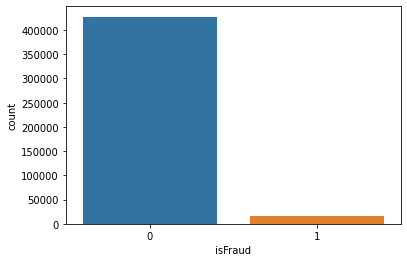

In [59]:
sns.countplot(x='isFraud', data= fraud_train)

In [60]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = fraud_train[(fraud_train['isFraud']==0)] 
df_minority = fraud_train[(fraud_train['isFraud']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 175443, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
fraud_train= df_upsampled

<AxesSubplot:xlabel='isFraud', ylabel='count'>

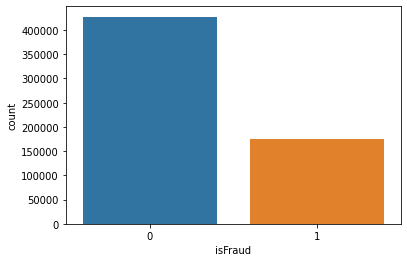

In [61]:
sns.countplot(x='isFraud', data= fraud_train)

In [62]:
kept_features = list(fraud_train)
drop_features = list(set(list(fraud_test)) - set(kept_features))
fraud_test.drop(drop_features, inplace = True, axis=1)

In [63]:
for col in fraud_test.columns:
    print(col)

TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
P_emaildomain
C1
C3
C5
C9
C13
D1
D2
D3
D4
D5
D10
D11
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V279
V280
V281
V282
V283
V284
V285
V286
V287
V288
V289
V290
V291
V292
V293
V294
V295
V296
V297
V298
V299
V300
V301
V302
V303
V304
V305
V306
V307
V308
V309
V310
V311
V312
V313
V314
V315
V316
V317
V318
V319
V320
V321


In [64]:
train_X = fraud_train.drop(axis="columns", labels="isFraud")
train_Y = fraud_train["isFraud"]


test_X  = fraud_test

In [65]:
train_X.shape

(602849, 215)

In [66]:
train_Y.shape

(602849,)

In [67]:
fraud_train.shape

(602849, 216)

In [68]:
fraud_test.shape

(147635, 215)

In [69]:
import sklearn
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

In [70]:
def predict_and_save(prediction, name):
    
    '''
        Utility Function to save the test data predictions locally.
    '''

    df = pd.DataFrame({'Id':test_ids.reshape(-1), 'isFraud':prediction.reshape(-1)})
    df = df.sort_values('Id')
    df.to_csv(name, index=False)

In [71]:
ids = list(range(0, 147635))
test_ids = np.array(ids)

In [72]:
test_ids.shape

(147635,)

In [73]:
lr = LogisticRegression(n_jobs = -1, class_weight = 'balanced', random_state = 3) 
lr.fit(train_X, train_Y)

lr_test = lr.predict(test_X)
predict_and_save(lr_test, 'lr_pred_bl.csv')

In [74]:
nb = GaussianNB(priors=[0.5,0.5]) 
nb.fit(train_X, train_Y)
GaussianNB(priors=[0.5, 0.5])
nb_test = nb.predict(test_X)
predict_and_save(nb_test, 'nb_pred_bl.csv')

In [75]:
dt =  DecisionTreeClassifier(random_state=3, class_weight='balanced')
dt.fit(train_X, train_Y)
DecisionTreeClassifier(class_weight='balanced', random_state=3)
dt_test = dt.predict(test_X)
predict_and_save(dt_test, 'dt_pred_bl.csv')

In [76]:
rf =  RandomForestClassifier(n_jobs = -1, class_weight = 'balanced', random_state = 3)
rf.fit(train_X, train_Y)

rf_test = rf.predict(test_X)
predict_and_save(rf_test, 'rf_pred_bl.csv')

In [77]:
weight = train_Y.value_counts()[0]/train_Y.value_counts()[1]
xgboost =  XGBClassifier(scale_pos_weight = weight, objective='binary:logistic', eval_metric = 'auc', random_state = 3, tree_method = 'gpu_hist')
xgboost.fit(train_X, train_Y)

xgboost_test = xgboost.predict(test_X)
predict_and_save(xgboost_test, 'xgboost_pred_bl.csv')

In [78]:
learning_rate = [2e-2, 3e-1, 1e-1]
max_depth = [8, 12, 16]
subsample = [0.6,0.8,1]
colsample_bytree = [0.6,0.8,1]
results = {}

results = {}

dtrain = xgb.DMatrix(train_X, label=train_Y)

for rate in learning_rate:
    for depth in max_depth:
        for sample in subsample:
            for colsample in colsample_bytree:
                params = {
                    'objective' : 'binary:logistic',
                    'eval_metric' : 'auc',
                    'learning_rate' : rate,
                    'max_depth' : depth,
                    'subsample' : sample,
                    'colsample_bytree' : colsample,
                    'tree_method' : 'gpu_hist',
                    'random_state' : 3,
                }

                history = xgb.cv(
                    params,
                    dtrain,
                    num_boost_round = 3000,
                    nfold = 3,
                    metrics ='auc',
                    early_stopping_rounds = 100,
                    verbose_eval=100,
                    seed=3,
                    shuffle = False
                )

                name = "learning_rate : "+str(rate)+" max_depth : "+str(depth)+" subsample : "+str(sample)+" colsample_bytree : "+str(colsample)
                results[name] = (history.iloc[-1]['train-auc-mean'],history.iloc[-1]['test-auc-mean'])

In [79]:
#I performed simple Grid Search with time based 3-fold CV but
#instead of using Scikit-Learn’s Grid Search Implementation I used XGBoost Cross Validation method
#which allowed me to not have the number of trees as the hyperparameter
#by setting a large value for number of trees and use Early Stopping

In [80]:
weight = train_Y.value_counts()[0]/train_Y.value_counts()[1]
epochs = 10

In [81]:
xgboost =  XGBClassifier(scale_pos_weight = weight, missing = -999, n_jobs = 1, max_depth = 9, learning_rate = 0.05, subsample = 0.9, colsample_bytree = 0.9, reg_alpha = 0.1, reg_lambda = 0.9, n_estimators = 500, random_state = 2019, tree_method = 'gpu_hist')
xgboost.fit(train_X, train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=-999, monotone_constraints='()', n_estimators=500,
              n_jobs=1, num_parallel_tree=1, predictor='auto',
              random_state=2019, reg_alpha=0.1, reg_lambda=0.9, ...)

In [94]:
xgboost_test = xgboost.predict(test_X)
predict_and_save(xgboost_test, 'xgboost_pred_bl.csv')

In [85]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=29))
model.add(Dense(1, activation='sigmoid')) 


In [86]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

In [87]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [88]:
hist = model.fit(train_X, train_Y, epochs=10, batch_size=3)

In [89]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [90]:
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=(train_X.shape[1])))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(train_X, 
                    train_Y, 
                    epochs=50, 
                    callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

In [91]:
predictions = model.predict(test_X)

In [92]:
predictions


In [93]:
predict_and_save(predictions, 'neural_pred_bl.csv')